In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading csv files
matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [3]:
#Returns the columns
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [4]:
#Returns the columns
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [5]:
matches.shape


(756, 18)

In [6]:
#Returns first 2 rows
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [7]:
#Returns first 2 rows
delivery.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [8]:
#Some Cleaning and Transformation
matches.drop(['umpire3'],axis=1,inplace=True) #since all the values are Nan
delivery.fillna(0,inplace=True) #filling all the Nan values with 0

In [9]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Delhi Capitals'],
      dtype=object)

In [10]:
#Replacing the Team Names with their abbreviations
matches.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants','Delhi Capitals'],['SRH','MI','GL','RPS','RCB','KKR','DD','KXIP','CSK','RR','DCC','KTK','PW','RPS','DC'],inplace=True)
delivery.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants','Delhi Capitals'],['SRH','MI','GL','RPS','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS','DC'],inplace=True)

In [11]:
#Some Basic Analysis
print("Total Matches Played: ",matches['id'].max())
print("\nNumber of matches played in each venue\n",matches['venue'].value_counts())
print("\nTeams: ",matches['team1'].unique())

Total Matches Played:  11415

Number of matches played in each venue
 Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Brabourne Stadium                            

In [12]:
#Total Umpires
print("Total Umpires:",matches['umpire1'].nunique())
#Player of the match 
print("Player of the match:",(matches['player_of_match'].value_counts()).idxmax())
#Highest number of match wins
print("Highest number of match wins is by :",(matches['winner'].value_counts()).idxmax())

Total Umpires: 61
Player of the match: CH Gayle
Highest number of match wins is by : MI


In [13]:
#Which is the best chasing team
print('Best Chasing team:',matches.iloc[matches['win_by_wickets'].idxmax()]['winner'])
#Which is the best chasing team
print('Best Chasing team:',matches.iloc[matches['win_by_runs'].idxmax()]['winner'])


Best Chasing team: KKR
Best Chasing team: MI


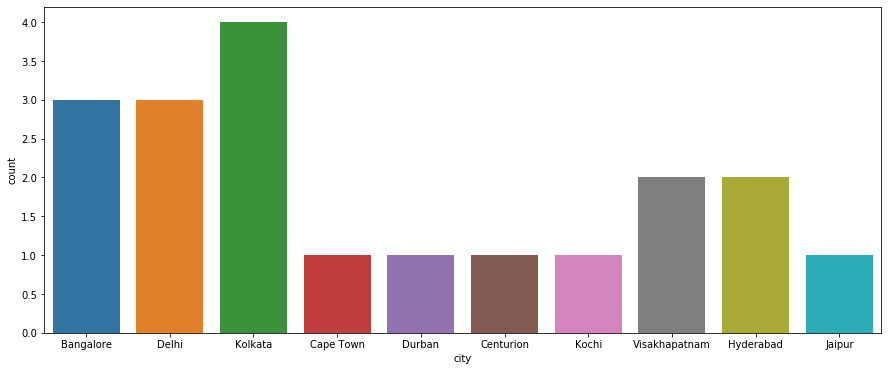

In [14]:
#In which city does Weather affected matches?
plt.figure(figsize=(15,6))
sns.countplot(matches.city[matches.dl_applied==1])
plt.show()

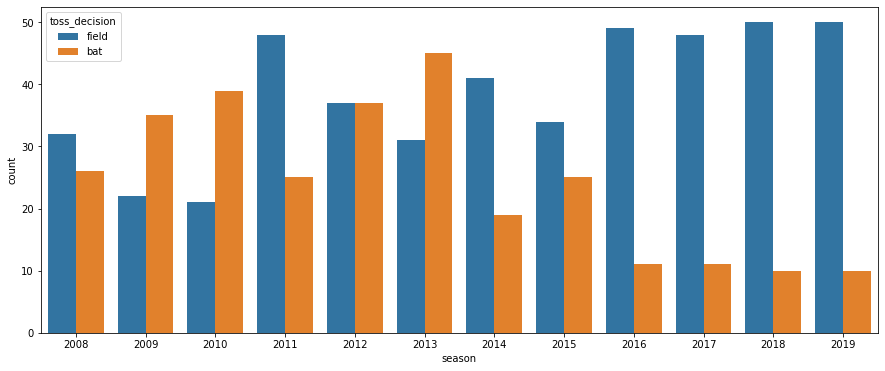

In [15]:
#Toss Decisions across Seasons
plt.figure(figsize=(15,6))
sns.countplot(x='season',hue='toss_decision',data=matches)
plt.show()

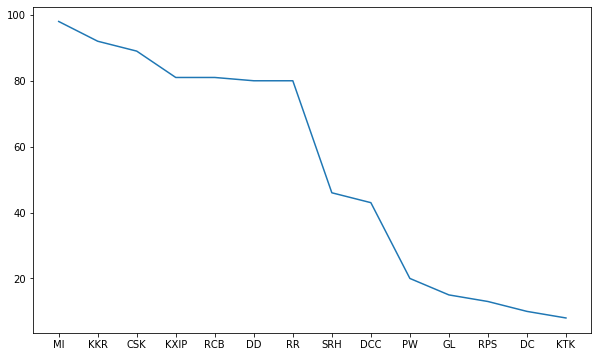

In [16]:
#Most of the Toss winner team
plt.figure(figsize=(10,6))
plt.plot(matches['toss_winner'].value_counts())
plt.show()    

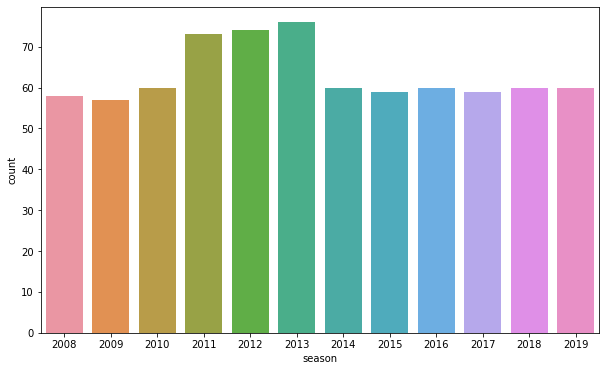

In [17]:
#Which season had most number of matches
plt.figure(figsize=(10,6))
sns.countplot(x='season', data=matches)
plt.show()

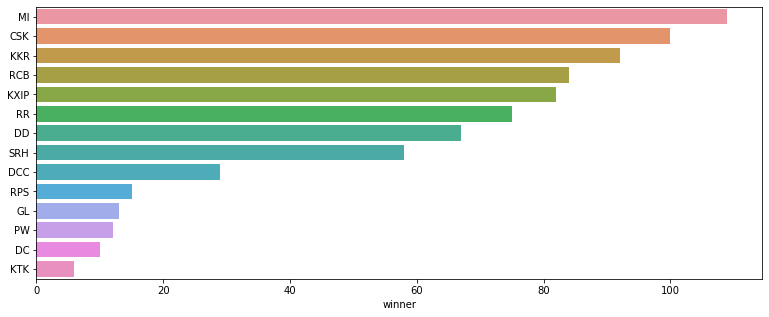

In [18]:
#Most successful IPL team
plt.figure(figsize=(13,5))
data = matches.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h');

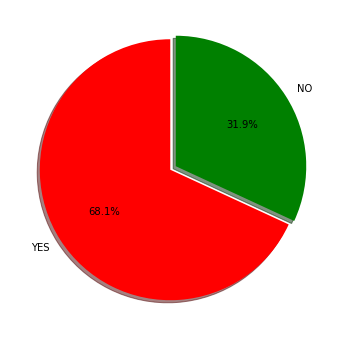

In [19]:
#Is Toss Winner Also the Match Winner
df= matches[matches['toss_winner']==matches['winner']]
slices=[len(df),(577-len(df))]
labels=['YES','NO']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

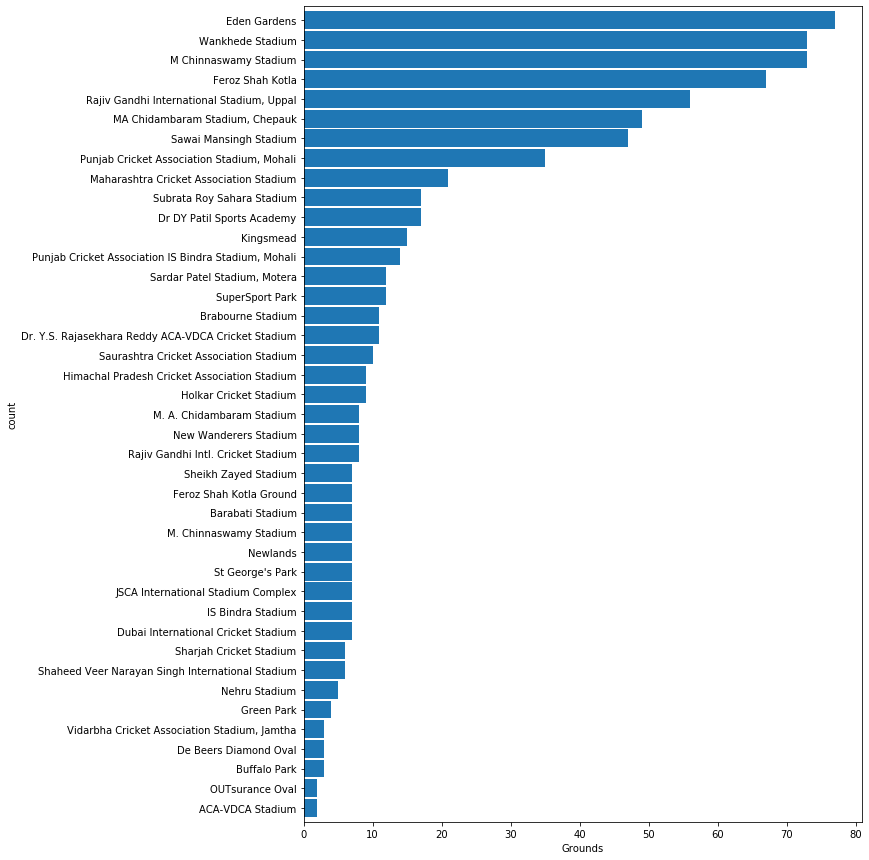

In [20]:
#Favourite Grounds
plt.figure(figsize=(10,15))
ax=matches['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9)
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
plt.show()

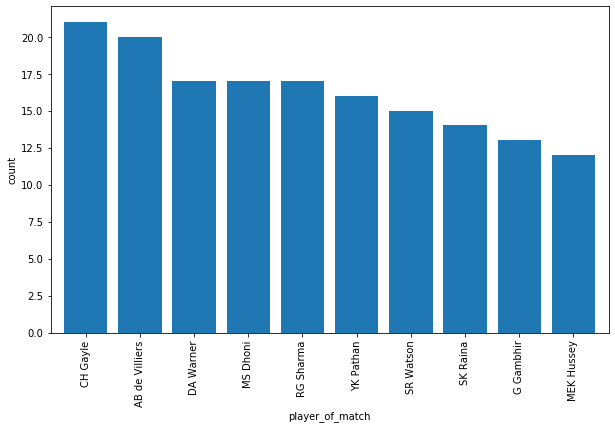

In [21]:
#Maximum man of matches
plt.figure(figsize=(10,6))
ax = matches['player_of_match'].value_counts().head(10).plot.bar(width=.8)  
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
plt.show()

In [22]:
#Top Individual Scores
top_scores = delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
top_scores.sort_values('batsman_runs', ascending=0).head(10)


,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
3686,243,PC Valthaty,KXIP,120
4223,279,V Sehwag,DD,119


In [23]:
#Getting the frequency of result column
matches['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64